# Customer Churn Analysis

This notebook is using customer churn data from Kaggle (https://www.kaggle.com/sandipdatta/customer-churn-analysis) and has been adopted from the notebook available on Kaggle developed by SanD.

The notebook will go through the following steps:
    1. Import Dataset
    2. Analyze the Data
    3. Prepare the data model building
    4. Split data in test and train data
    5. Train model using various machine learning algorithms for binary classification
    6. Evaluate the models
    7. Select the model best fit for the given data set
    8. Save and deploy model to Watson Machine Learning

In [8]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [9]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
import json

## Dataset

The original dataset can be downloaded from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data. Then upload it to IBM Watson Studio and insert the code to read the data using "insert to code > Insert panndas DataFrame".

In [10]:
# @hidden_cell
df_data_1 = pd.read_csv('./assets/data_asset/bigml_59c28831336c6604c800002a.csv')
df_data_1.head()
# make sure you assign the dataframe to the variable "df"
df = df_data_1
print (df.shape)

(3333, 21)


Examine the first 5 lines of the input

In [11]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

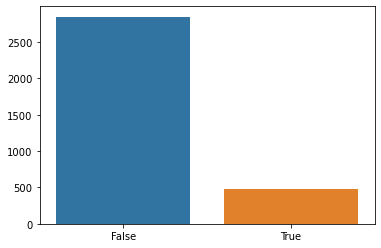

In [12]:
y = df["churn"].value_counts()
sns.barplot(y.index, y.values)

In [13]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


## Descriptive Analysis of the Data

In [14]:
  df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Churn by State 

<AxesSubplot:xlabel='state'>

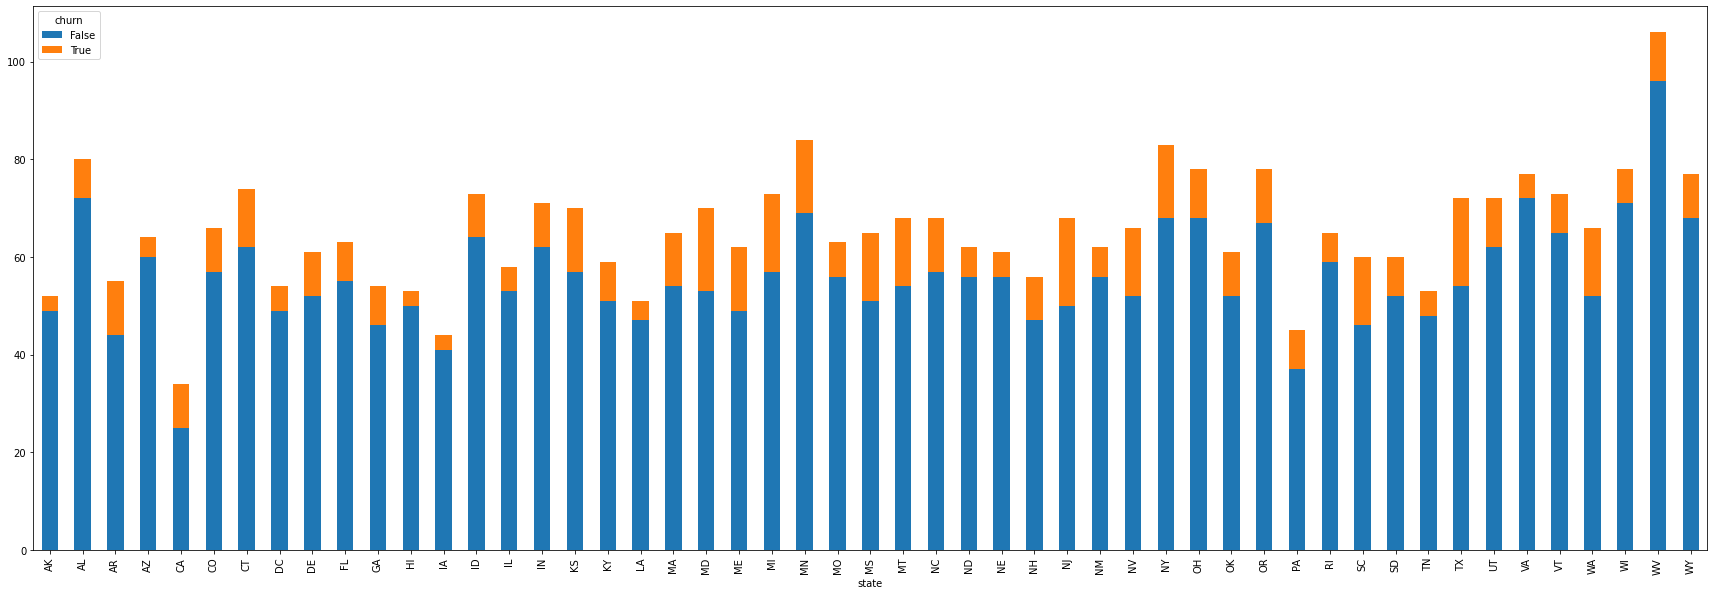

In [15]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Churn by Area Code 

<AxesSubplot:xlabel='area code'>

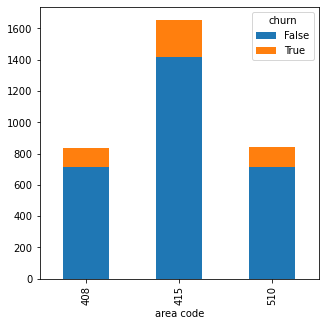

In [16]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

###  Churn by customers with International Plan 

<AxesSubplot:xlabel='international plan'>

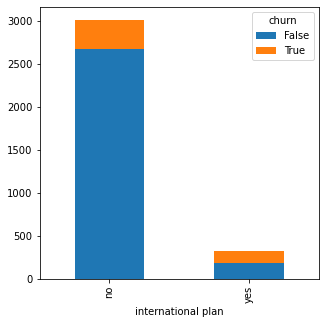

In [17]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn By Customers with Voice mail plan

<AxesSubplot:xlabel='voice mail plan'>

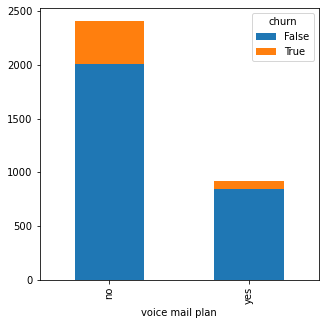

In [18]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

## Data Preparation

The following preprocessing steps need to be done:
1. Turn categorical variables into discrete numerical variables
2. Create response vector
3. Drop superflous columns
4. Build feature matrix
5. Standardize feature matrix values

### Encode categorical columns

In [19]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

# State, international plans and voice mail plan are strings and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

print (df.dtypes)

state                       int64
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [20]:
print (df.shape)
df.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Create response vector

In [21]:
y = df['churn'].values.astype(np.int)
y.size

3333

### Drop superflous columns

In [22]:
# df = df.drop(["Id","Churn"], axis = 1, inplace=True)
df.drop(["phone number","churn"], axis = 1, inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### Build feature matrix

In [23]:
X = df.values.astype(np.float)
print(X)
X.shape

[[ 16.   128.   415.   ...   3.     2.7    1.  ]
 [ 35.   107.   415.   ...   3.     3.7    1.  ]
 [ 31.   137.   415.   ...   5.     3.29   0.  ]
 ...
 [ 39.    28.   510.   ...   6.     3.81   2.  ]
 [  6.   184.   510.   ...  10.     1.35   2.  ]
 [ 42.    74.   415.   ...   4.     3.7    0.  ]]


(3333, 19)

### Standardize Feature Matrix values

In [24]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

This completes the data preparation steps.

## Split Train/Test Validation Data

We need to adopt Stratified Cross Validation - Since the Response values are not balanced

In [25]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

## Build Models and Train

We will build models using a variety of approaches to see how they compare:

In [26]:
# create classifiers
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()

from sklearn.svm import SVC
svc_model = SVC(gamma='auto')

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)

from sklearn.neighbors import KNeighborsClassifier
k_neighbors = KNeighborsClassifier()

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='lbfgs')

In [27]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, random_forest))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, k_neighbors))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, logistic_regression))))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.94
K Nearest Neighbor Classifier: 0.89
Logistic Regression:           0.86


## Model Evaluation

We will now generate confusion matrices for the various models to analyze the prediction in more detail.

### Gradient Boosting Classifier

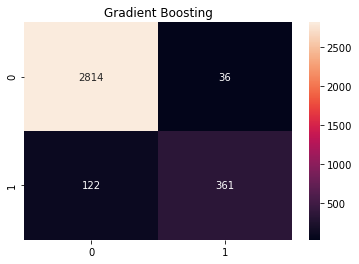

In [28]:
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, gradient_boost))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

### Support Vector Machines

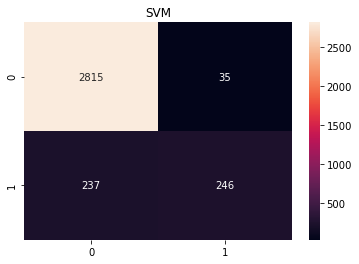

In [29]:
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svc_model))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

### Random Forest

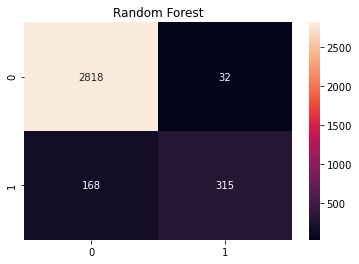

In [30]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, random_forest))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

### Classification Report

In [31]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, random_forest))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.91      0.73      0.81       483

    accuracy                           0.95      3333
   macro avg       0.93      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2850
           1       0.88      0.50      0.64       483

    accuracy                           0.92      3333
   macro avg       0.90      0.74      0.80      3333
weighted avg       0.91      0.92      0.91      3333


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2850
           1       0.92      0.66      0.77       483

    accuracy                           0.94      3333
   macro avg       0.93      0.83     

## Final Model Selection

Gradient Boosting seems to do comparatively better for this case

In [32]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

[0.00227858 0.00347821 0.00059119 0.09486837 0.03234627 0.0512265
 0.11041401 0.00419125 0.18023873 0.09007594 0.00081427 0.0536815
 0.0098265  0.00060243 0.00833141 0.06738731 0.11059992 0.01609263
 0.16295499]


<AxesSubplot:>

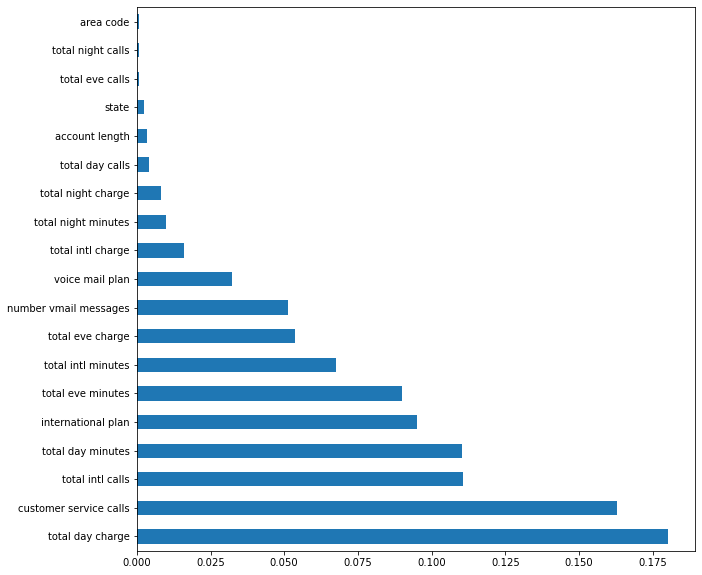

In [33]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

## Save and Deploy model to Watson Machine Learning

In [34]:
def guid_from_space_name(client, space_name):
     instance_details = client.service_instance.get_details()
     space = client.spaces.get_details()
     return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])
    
# create client to access our WML service
from watson_machine_learning_client import WatsonMachineLearningAPIClient

#wml_credentials = {
#  "apikey": "****",
#  "iam_apikey_description": "Auto-generated for key ****",
#  "iam_apikey_name": "wdp-writer",
#  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
#  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/bc1bd51c396536dc7d5f81d5a4e****::serviceid:ServiceId-855c9709-e7f0-4fcc-8c48-93540cde****",
#  "instance_id": "****",
#  "password": "****",
#  "url": "https://us-south.ml.cloud.ibm.com",
#  "username": "****"
#}

import sys,os,os.path
token = os.environ['USER_ACCESS_TOKEN']

wml_credentials = {
"token": token,
"instance_id" : "wml_local",
"url": "https://wsl-cpd-wsl.apps.wisccp4d2-master-1.fyre.ibm.com/",
"version": "2.5.0"
}

client = WatsonMachineLearningAPIClient(wml_credentials)
space_uid = guid_from_space_name(client, 'test')
print(space_uid)
client.set.default_space(space_uid)
print(client.version)





ModuleNotFoundError: No module named 'watson_machine_learning_client'

In [ ]:
# Use this cell to do any cleanup of previously created models and deployments
client.repository.list_models()
client.deployments.list()

# client.repository.delete('GUID of stored model')
# client.deployments.delete('GUID of deployed model')

In [ ]:
#Specify model meta data for CP4D 
meta_props={
 client.repository.ModelMetaNames.NAME: "Gradient Boosting model to predict customer churn",
 client.repository.ModelMetaNames.RUNTIME_UID: "scikit-learn_0.20-py3.6",
 client.repository.ModelMetaNames.TYPE: "scikit-learn_0.20",
}

In [ ]:
# store the model in WML
# meta_props={client.repository.ModelMetaNames.NAME: "Gradient Boosting model to predict customer churn"}
# published_model = client.repository.store_model(model=gbc, meta_props={client.repository.ModelMetaNames.NAME: "Gradient Boosting model to predict customer churn"})
published_model = client.repository.store_model(model=gbc, meta_props=meta_props)


In [ ]:
# new list of models
client.repository.list_models()

# get UID of our just stored model
model_uid = client.repository.get_model_uid(published_model)
print("Model id: {}".format(model_uid))

In [ ]:
# create deployment (for public cloud)
#created_deployment = client.deployments.create(model_uid, name="customer_churn_model_gb")

# new list of deployments
#client.deployments.list()

# get UID of our new deployment
#deployment_uid = client.deployments.get_uid(created_deployment)
#print("Deployment id: {}".format(deployment_uid))
#print(created_deployment)

In [ ]:
# Deploy in CP4D
deploy_meta = {
     client.deployments.ConfigurationMetaNames.NAME: "Chengmin_Test",
     client.deployments.ConfigurationMetaNames.ONLINE: {}
 }

deployment_details = client.deployments.create(model_uid, meta_props=deploy_meta)
deployment_uid = client.deployments.get_uid(deployment_details)
print('Deployment uid = {}'.format(deployment_uid))   

In [ ]:
# get scoring end point
##scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
##print(scoring_endpoint)

In [ ]:
# use our WML client to score our model

# add some test data, only for public cloud
scoring_payload = {'fields': ['state', 'account length', 'area code', 'international plan', 'voice mail plan',
        'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',
        'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
        'total intl charge', 'customer service calls'], 
                    'values': [[2,162,415,0,0,0,70.7,108,12.02,157.5,87,13.39,154.8,82,6.97,9.1,3,2.46,4]]}

# cp4d
scoring_data = {
           client.deployments.ScoringMetaNames.INPUT_DATA: [
                scoring_payload
            ]
        }


In [ ]:
# score the model
# predictions = client.deployments.score(scoring_endpoint, scoring_payload)
predictions = client.deployments.score(deployment_uid, scoring_data)
print('prediction',json.dumps(predictions, indent=2))

## Acknowledgement

The approach and code fragments have been adopted from the nootebook on Kaggle by Sandip Datta (https://www.kaggle.com/sandipdatta). 
The full original notebook can be viewed here: https://www.kaggle.com/sandipdatta/customer-churn-analysis#